Link to Medium blog post: https://towardsdatascience.com/transforming-variables-in-a-pandas-dataframe-bce2c6ef91a1

# How to transform variables in a pandas DataFrame

## 1. Data

In [1]:
# Import packages
import numpy as np
import pandas as pd
# Update default settings to show 2 decimal place
pd.options.display.float_format = '{:.2f}'.format
# Create a small dataframe
df = pd.DataFrame({'name': ['bob 2012', 'Ava 2013', 'Aby 007', 'XYZ 8', 'GRZ x7', 'Boo VIII', 'Joy 2020'],
                   'p_date': ['2020-02-01', '2020-05-01', '2020-06-30', '2020-04-15', '2020-01-04', '2020-03-21', '2020-07-08'],
                   'count': [80, 30, 10, 60, 40, 20, np.nan],
                   'colour': ['pink', 'teal', 'velvet', 'pink', 'green', 'teal', 'pink'],
                   'radius': [1, 2, 3, 4, 5, 6, 7],
                   'unit': ['cm', 'inch', 'cm', 'cm', 'inch', 'cm', 'cm']})
df

,name,p_date,count,colour,radius,unit
0,bob 2012,2020-02-01,80.00,pink,1,cm
1,Ava 2013,2020-05-01,30.00,teal,2,inch
2,Aby 007,2020-06-30,10.00,velvet,3,cm
3,XYZ 8,2020-04-15,60.00,pink,4,cm
4,GRZ x7,2020-01-04,40.00,green,5,inch
5,Boo VIII,2020-03-21,20.00,teal,6,cm
6,Joy 2020,2020-07-08,NaN,pink,7,cm


### 1.1. Data dictionary

Each row represents a kind of marble. Columns are defined as:

◼ name: Name for each marble (first part is the model name and second is the version)

◼ purchase_date: Date I purchased a kind of marbles

◼ count: How many marbles I own for a particular kind

◼ colour: Colour of the kind

◼ radius: Radius measurement of the kind 

◼ unit: A unit for radius

## 2. Transform variables

### 2.1. Transform numerical variables

Type: Create a conditional variable based on 2 conditions.

Task: Radius is not directly comparable across kinds as they are expressed in different units. Let’s create a variable showing radius in cm for consistency.

Answer: We will call the new variable radius_cm. Given that 1 inch equals 2.54 cm, we can summarise the conditions as follows:
1) If unit is ‘cm’ then radius_cm = radius
2) If unit is ‘inch’ then radius_cm = 2.54 * radius

We can create radius_cm using the script below:

In [2]:
# Method using np.where
df['radius_cm'] = np.where(df['unit']=='inch', 2.54 * df['radius'], df['radius'])
# ============== ALTERNATIVE METHODS ==============
## Method using np.select
# df['radius_cm'] = np.select([df['unit']=='inch'], [2.54 * df['radius']], default=df['radius'])
## Method applying lambda function with if
# df['radius_cm'] = df[['radius', 'unit']].apply(lambda x: 2.54 * x[0] if x[1]=='inch' else x[0], axis=1)
## Method A using loc
# df.loc[df['unit']!='inch', 'radius_cm'] = df['radius']
# df.loc[df['unit']=='inch', 'radius_cm'] = 2.54 * df['radius']
## Method B using loc (works as long as df['radius'] has no missing data)
# df['radius_cm'] = df['radius']
# df.loc[df['unit']=='inch', 'radius_cm'] = 2.54 * df['radius']
# Inspect results
df

,name,p_date,count,colour,radius,unit,radius_cm
0,bob 2012,2020-02-01,80.00,pink,1,cm,1.00
1,Ava 2013,2020-05-01,30.00,teal,2,inch,5.08
2,Aby 007,2020-06-30,10.00,velvet,3,cm,3.00
3,XYZ 8,2020-04-15,60.00,pink,4,cm,4.00
4,GRZ x7,2020-01-04,40.00,green,5,inch,12.70
5,Boo VIII,2020-03-21,20.00,teal,6,cm,6.00
6,Joy 2020,2020-07-08,NaN,pink,7,cm,7.00


Type: Create a conditional variable based on 2 conditions (Categorise).

Task: Create a variable describing marble size based on its radius in cm.

Answer: We will call the new variable size. Let’s define ‘big’ as marbles with radius of 5 cm or higher, and anything lower as ‘small’. Therefore, the conditions are:
1) If radius_cm ≥ 5 then size = ‘big’
2) If radius_cm < 5 then size = ‘small’

We can create size using the script below:

In [3]:
# Method applying lambda function with if
df['size'] = df['radius_cm'].apply(lambda x: 'big' if x>=5 else 'small')
# Inspect results
df.sort_values('radius_cm')

,name,p_date,count,colour,radius,unit,radius_cm,size
0,bob 2012,2020-02-01,80.00,pink,1,cm,1.00,small
2,Aby 007,2020-06-30,10.00,velvet,3,cm,3.00,small
3,XYZ 8,2020-04-15,60.00,pink,4,cm,4.00,small
1,Ava 2013,2020-05-01,30.00,teal,2,inch,5.08,big
5,Boo VIII,2020-03-21,20.00,teal,6,cm,6.00,big
6,Joy 2020,2020-07-08,NaN,pink,7,cm,7.00,big
4,GRZ x7,2020-01-04,40.00,green,5,inch,12.70,big


Type: Create a calculated variable.

Task: Calculate sphere volume for marbles.

Formula: 

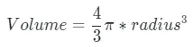

Answer: We can create volume using the script below:

In [4]:
# Method using eval
pi = np.pi
df.eval("volume = 4/3 * @pi * radius**3", inplace=True)
# ============== ALTERNATIVE METHOD ==============
## Method using simple operators
# df['volume'] = 4/3 * np.pi * df['radius']**3
## Method using pandas wrappers
# df['volume2'] = df['radius'].pow(3).mul(4/3*np.pi)
## Short description for pow, mul and a few other wrappers:
## add: for addition 
## sub: for subtractaction
## mul: for multiplication
## div: for division
## pow: for exponential power (Tip: can use pow(0.5) or pow(1/2) for square root)
# Inspect results
df

,name,p_date,count,colour,radius,unit,radius_cm,size,volume
0,bob 2012,2020-02-01,80.00,pink,1,cm,1.00,small,4.19
1,Ava 2013,2020-05-01,30.00,teal,2,inch,5.08,big,33.51
2,Aby 007,2020-06-30,10.00,velvet,3,cm,3.00,small,113.10
3,XYZ 8,2020-04-15,60.00,pink,4,cm,4.00,small,268.08
4,GRZ x7,2020-01-04,40.00,green,5,inch,12.70,big,523.60
5,Boo VIII,2020-03-21,20.00,teal,6,cm,6.00,big,904.78
6,Joy 2020,2020-07-08,NaN,pink,7,cm,7.00,big,1436.76


Type: Segment numerical values into equal width bins (Discritise).

Task: Create a variable that splits the marbles into 2 bins of equal width based on their counts.

Answer: We will call the new variable cut.

◼ min count = 10

◼ max count = 80

◼ range count = max — min = 70

◼ bin width = range / number of bins = 70 / 2 = 35

As count ranges from 10 to 80 marbles, having 2 bins would mean that the first bin would be 10 to 45 and the second 45 to 80, each with an equal width of 35. Currently, we have defined bins to be inclusive of the rightmost edge with the default setting: right=True. This means if we had 45 marbles for a kind, it would fall into the lower bin (i.e. 10–45). We could easily change this behaviour to be exclusive of the rightmost edge by adding right=False inside the function below. Please also see my note in the next task.

We can create cut using the script below:

In [5]:
# Method using pandas.cut
df['cut'] = pd.cut(df['count'], bins=2, labels=['bin1', 'bin2'])
# Inspect results
df[['count', 'cut']].sort_values('count')

,count,cut
2,10.00,bin1
5,20.00,bin1
1,30.00,bin1
4,40.00,bin1
3,60.00,bin2
0,80.00,bin2
6,NaN,NaN


Type: Segment numerical values into equal sized bins (Discritise).

Task: Create a variable that splits the marbles into 2 equal sized buckets (i.e. quantiles) based on their counts.

Answer: We will call the new variable qcut.

◼ sorted count in ascending order: 10, 20, 30, 40, 60, 80

◼ # records = 6

◼ # quantiles = 2

◼ # records per quantile = # records / # quantiles = 6 / 2 = 3

As count has 6 non-missing values in it, having equal sized buckets would mean that the first quantile would include: 10, 20, 30 and the second would include: 40, 50, 60, each with an equal size of 3.

We can create it using the script below:

In [6]:
# Method using pandas.qcut
df['qcut'] = pd.qcut(df['count'], q=2, labels=['q1', 'q2'])
# Inspect results
df[['count', 'cut', 'qcut']].sort_values('count')

,count,cut,qcut
2,10.00,bin1,q1
5,20.00,bin1,q1
1,30.00,bin1,q1
4,40.00,bin1,q2
3,60.00,bin2,q2
0,80.00,bin2,q2
6,NaN,NaN,NaN


### 2.2. Transform categorical or string variables

Type: Create a conditional variable based on 3+ conditions (Group).

Task: Create a variable that abbreviates pink into ‘PK’, teal into ‘TL’ and all other colours (velvet and green) into ‘OT’.

Answer: We will call the new variable colour_abr. So the conditions are:
1) If colour is ‘pink’ then colour_abr = ‘PK’
2) If colour is ‘teal’ then colour_abr = ‘TL’
3) If colour is either ‘velvet’ or ‘green’ then colour_abr = ‘OT’.

We can create colour_abr using the script below:

In [7]:
# Method using replace
df['colour_abr'] = df['colour'].replace({'pink': 'PK', 'teal': 'TL', 'velvet': 'OT', 'green': 'OT'})
# ============== ALTERNATIVE METHODS ==============
## Method A using map
# mapping = {'pink':'PK', 'teal': 'TL', 'velvet': 'OT', 'green': 'OT'}
# df['colour_abr'] = df['colour'].map(mapping)
## Method B using map (works as long as df['colour'] has no missing data)
# df['colour_abr'] = df['colour'].map({'pink':'PK', 'teal': 'TL'})
# df['colour_abr'].fillna('OT', inplace=True)
## Method using nested np.wheres
# df['colour_abr'] = np.where(df['colour']=='pink', 'PK', np.where(df['colour']=='teal', 'TL', 'OT'))
## Method using np.select
# df['colour_abr'] = np.select([df['colour']=='pink', df['colour']=='teal'], ['PK', 'TL'] , default='OT')
## Method applying lambda function with nested ifs
# df['colour_abr'] = df['colour'].apply(lambda x: 'PK' if x=='pink' else ('TL' if x=='teal' else 'OT'))
## Method using list comprehension
# df['colour_abr'] = ['PK' if x=='pink' else ('TL' if x=='teal' else 'OT') for x in df['colour']]
## Method A using loc
# df.loc[df['colour'] == 'pink', 'colour_abr'] = 'PK'
# df.loc[df['colour'] == 'teal', 'colour_abr'] = 'TL'
# df.loc[df['colour'].isin(['velvet', 'green']), 'colour_abr'] = 'OT'
## Method B using loc (works as long as df['colour'] has no missing data)
# df['colour_abr'] = 'OT'
# df.loc[df['colour'] == 'pink', 'colour_abr'] = 'PK'
# df.loc[df['colour'] == 'teal', 'colour_abr'] = 'TL'
# Inspect results
df[['colour', 'colour_abr']].sort_values('colour_abr')

,colour,colour_abr
2,velvet,OT
4,green,OT
0,pink,PK
3,pink,PK
6,pink,PK
1,teal,TL
5,teal,TL


If we were just renaming the categories instead of grouping, we could also use either of the following method from .cat accessor in addition to the methods shown above:

In [9]:
# Create a copy of colour and convert type to category
df['colour_abr'] = df['colour'].astype('category')
# Method using .cat.rename_categories
df['colour_abr'].cat.rename_categories({'green':'GN', 'pink':'PK', 'teal':'TL', 'velvet': 'VT'})
# ============== ALTERNATIVE METHOD ==============
## Method using .cat.categories
## Make sure to get the order of the categories right
## Check the order with by running df['colour_abr'].cat.categories
# df['colour_abr'].cat.categories = ['GN', 'PK', 'TL','VT']
# Inspect results
df[['colour', 'colour_abr']].sort_values('colour_abr')

,colour,colour_abr
4,green,green
0,pink,pink
3,pink,pink
6,pink,pink
1,teal,teal
5,teal,teal
2,velvet,velvet


Type: Parse a string (Extract a part from a string).

Task: Parse name such that we have new columns for model and version.

Answer: We will now use a method from .str accessor to extract parts:

In [10]:
# Method using .str.split
df[['model', 'version']] = df['name'].str.split(' ', expand=True)
# ============== ALTERNATIVE METHOD ==============
## Method applying lambda function
# df['model'] = df['name'].apply(lambda x: x.split(' ')[0])
# df['version'] = df['name'].apply(lambda x: x.split(' ')[1])
# Inspect results
df[['name', 'model', 'version']]

,name,model,version
0,bob 2012,bob,2012
1,Ava 2013,Ava,2013
2,Aby 007,Aby,007
3,XYZ 8,XYZ,8
4,GRZ x7,GRZ,x7
5,Boo VIII,Boo,VIII
6,Joy 2020,Joy,2020


Type: Concatenate or combine columns (Opposite of task above).

Task: Combine values in model (make it uppercase) and radius in a new column.

Answer: We will now use the script below to concatenate:

In [11]:
# Method using + operator
df['mod_rad'] = df['model'].str.upper() + '_' + df['radius'].astype(str)
# ============== ALTERNATIVE METHOD ==============
## Method using chained .str methods
# df['mod_rad'] = df['model'].str.upper().str.cat(df['radius'].astype(str), sep="_")
# Inspect results
df

,name,p_date,count,colour,radius,unit,radius_cm,size,volume,cut,qcut,colour_abr,model,version,mod_rad
0,bob 2012,2020-02-01,80.00,pink,1,cm,1.00,small,4.19,bin2,q2,pink,bob,2012,BOB_1
1,Ava 2013,2020-05-01,30.00,teal,2,inch,5.08,big,33.51,bin1,q1,teal,Ava,2013,AVA_2
2,Aby 007,2020-06-30,10.00,velvet,3,cm,3.00,small,113.10,bin1,q1,velvet,Aby,007,ABY_3
3,XYZ 8,2020-04-15,60.00,pink,4,cm,4.00,small,268.08,bin2,q2,pink,XYZ,8,XYZ_4
4,GRZ x7,2020-01-04,40.00,green,5,inch,12.70,big,523.60,bin1,q2,green,GRZ,x7,GRZ_5
5,Boo VIII,2020-03-21,20.00,teal,6,cm,6.00,big,904.78,bin1,q1,teal,Boo,VIII,BOO_6
6,Joy 2020,2020-07-08,NaN,pink,7,cm,7.00,big,1436.76,NaN,NaN,pink,Joy,2020,JOY_7


### 2.3. Transform datetime variables

Type: Parse a datetime (Extract a part from a datetime).

Task: Extract the days of the week, and years of purchase.

Answer: We will now use method from .dt accessor to extract parts:

In [12]:
# Convert type to datetime
df['p_date'] = pd.to_datetime(df['p_date'])
# Method using .dt.day_name() and dt.year
df['p_dname'] = df['p_date'].dt.day_name()
df['p_year'] = df['p_date'].dt.year
# Inspect results
df[['p_date', 'p_dname', 'p_year']]

,p_date,p_dname,p_year
0,2020-02-01,Saturday,2020
1,2020-05-01,Friday,2020
2,2020-06-30,Tuesday,2020
3,2020-04-15,Wednesday,2020
4,2020-01-04,Saturday,2020
5,2020-03-21,Saturday,2020
6,2020-07-08,Wednesday,2020


## 3. Putting everything together

Now we will get familiar with assign, which allows us to create multiple variables at one go. Once tested, we can combine the steps like below:

In [13]:
# Convert type to datetime
df['p_date'] = pd.to_datetime(df['p_date'])
# Derive variables
df = df.assign(radius_cm = np.where(df['unit']=='inch', 2.54 * df['radius'], df['radius']),
               # Referenced radius as radius_cm hasn't been created yet
               size = list(map(lambda r, u: 'big' if ((u=='cm') & (r>=5)) | ((u=='inch') & (2.54*r>=5)) 
                               else 'small', df['radius'], df['unit'])),
               volume = 4/3 * np.pi * df['radius']**3,
               cut = pd.cut(df['count'], bins=2, labels=['bin1', 'bin2']),
               qcut = pd.qcut(df['count'], q=2, labels=['q1', 'q2']),
               colour_abr = df['colour'].replace({'pink': 'PK', 'teal': 'TL', 'velvet': 'OT', 'green': 'OT'}),
               # If you find a way to combine the following 2 lines in 1 line inside assign(), feel free to teach me how
               model = df['name'].str.split(' ', expand=True)[0],
               version = df['name'].str.split(' ', expand=True)[1],
               mod_rad = df['name'].str.split(' ', expand=True)[0].str.upper() + '_' + df['radius'].astype(str),
               p_dname = df['p_date'].dt.day_name(),
               p_year = df['p_date'].dt.year)
# Inspect results
df

,name,p_date,count,colour,radius,unit,radius_cm,size,volume,cut,qcut,colour_abr,model,version,mod_rad,p_dname,p_year
0,bob 2012,2020-02-01,80.00,pink,1,cm,1.00,small,4.19,bin2,q2,PK,bob,2012,BOB_1,Saturday,2020
1,Ava 2013,2020-05-01,30.00,teal,2,inch,5.08,big,33.51,bin1,q1,TL,Ava,2013,AVA_2,Friday,2020
2,Aby 007,2020-06-30,10.00,velvet,3,cm,3.00,small,113.10,bin1,q1,OT,Aby,007,ABY_3,Tuesday,2020
3,XYZ 8,2020-04-15,60.00,pink,4,cm,4.00,small,268.08,bin2,q2,PK,XYZ,8,XYZ_4,Wednesday,2020
4,GRZ x7,2020-01-04,40.00,green,5,inch,12.70,big,523.60,bin1,q2,OT,GRZ,x7,GRZ_5,Saturday,2020
5,Boo VIII,2020-03-21,20.00,teal,6,cm,6.00,big,904.78,bin1,q1,TL,Boo,VIII,BOO_6,Saturday,2020
6,Joy 2020,2020-07-08,NaN,pink,7,cm,7.00,big,1436.76,NaN,NaN,PK,Joy,2020,JOY_7,Wednesday,2020


As a final note, when creating variables, if you make a mistake, you could always overwrite the incorrect variable with the correct one or delete it using the script below:

In [15]:
# Method A using del
# del(df['var_name'])
# ============== ALTERNATIVE METHODS ==============
## Method B using del
# del df['var_name']
## Method using drop
# df.drop(columns='var_name', inplace=True)